<h1><center>Introduction</center></h1>
<strong><center>Shreyas Vaderiyattil, Ritvik Singh, Shiv Rathod</strong></h1>

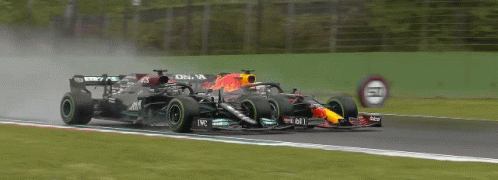

Formula One is an international racing league that gathers the top drivers from around the world and they compete against each other using one of the fastest cars built for racing on circuits around the world. In this tutorial we will be analyizing the lap times of various drivers as well as their pit stop times. In addition, we will take a look at these timings and compare it to their qualified place for the race and see if a driver would place above or below their qualified time.

Predicting what place a driver can place is important to not only the racing team and driver but also fans that follow the sport. Racing teams and drivers find this useful for their approach and strategy for the race. This can help with fast decisions that are needed during a race between the driver and the team.


# Data

We looked into data on Kaggle which featured qualifying, circuit, pit stop time, lap time, and more. We found other databases that had similar datasets however, Kaggle provided all the data in an organized fashion.

We will look into races between 2016 - 2021 which are the years with the latest changes to F1 including engine and structure changes. 

# Processing the Data

Here we import all of the packages that we need to conduct our analysis and then read in the data from the CSV files to start our analysis.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
circuit_data = pd.read_csv('circuits.csv')
driver_data = pd.read_csv('drivers.csv')
lap_data = pd.read_csv('lap_times.csv')
pit_data = pd.read_csv('pit_stops.csv')
quali_data = pd.read_csv('qualifying.csv')
race_data = pd.read_csv('races.csv')
result_data = pd.read_csv('results.csv')

In [3]:
circuit_data.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

We have circuit data to extract the circuitId needed for analysis. 
In this dataset we have data for what type of circuit, location, and its longitude and latitude.

In [4]:
driver_data.head()


driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

We have driver data to extract the drivers that have raced on the circuits that we are analyzing. 
Driver data outputs the driver, their number, name, DOB, and nationality.

In [5]:
lap_data.head()

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

We have extracted lap_data for analysis on lap times per driver for each race. This dataset outputs which lap, what position, and the time.

In [6]:
pit_data.head()

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

We have extracted pit stop data for analysis on how this timing can affect what positon a driver finishes in. This dataset provides which lap the driver pitted in and how long the pit stop was.

In [7]:
quali_data.head()

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236

Qualifying data provides times as well as the position the driver starts in at the end of qualifiying. Q1, Q2, Q3 are provided as well as the race and driver id.

In [8]:
race_data.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

The race dataset provides a given race as well as the circuit that given race happened as well as the date for analysis. 

In [9]:
result_data.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

Lastly, we have the results dataset. This dataset provides the race, drive id as well as their starting and ending position. This dataset will help with training our data for later machine learning analysis on starting and ending positons. 

Our first task is to have all of our datasets be filtered between 2016-2021.
We first want to filter the data for all the datasets to contain races between the years 2016-2021 for our analysis. We then want to extract all the circuits that were raced on between this time frame.
This process is repeated for the rest of the datasets.

In [10]:
# Retrieve all races that are between 2016 and 2021
new_race_data = race_data[(race_data['year'] >= 2016)]

# Extract the circuits that were raced on in this time frame
unique_circuits = race_data['circuitId'].unique()
new_circuit_data = circuit_data[np.isin(circuit_data['circuitId'], unique_circuits)]

# Extract the results of the races between the time frame
new_result_data = result_data[np.isin(result_data, new_race_data['raceId'])]

# Extract the drivers that raced in this time frame
new_driver_data = driver_data[np.isin(driver_data, new_result_data['driverId'])]

# Extract lap_times for each race in this time frame
new_lap_data = lap_data[np.isin(lap_data, new_race_data['raceId'])]

# Extract pit data for each race in this time frame
new_pit_data = pit_data[np.isin(pit_data, new_race_data['raceId'])]

# Extract quailifying time data from each race in this time frame
new_quali_data = quali_data[np.isin(quali_data, new_race_data['raceId'])]

Now that we have filtered each dataset to fit our current time frame we can now visualize the datasets. We will first look into visualizing a drivers average pit stop time per race and the difference between their starting and ending position.
We will be analyzing 3 drivers during 3 different time periods and see average pit stop time vs. difference in position.

In [11]:
new_driver_data

driverId           driverRef number code    forename        surname  \
0           1            hamilton     44  HAM       Lewis       Hamilton   
1           2            heidfeld     \N  HEI        Nick       Heidfeld   
2           3             rosberg      6  ROS        Nico        Rosberg   
3           4              alonso     14  ALO    Fernando         Alonso   
7           8           raikkonen      7  RAI        Kimi      Räikkönen   
8           9              kubica     88  KUB      Robert         Kubica   
10         11                sato     \N  SAT      Takuma           Sato   
12         13               massa     19  MAS      Felipe          Massa   
13         14           coulthard     \N  COU       David      Coulthard   
14         15              trulli     \N  TRU       Jarno         Trulli   
16         17              webber     \N  WEB        Mark         Webber   
17         18              button     22  BUT      Jenson         Button   
19         20              vettel      5  VET   Sebastian         Vettel   
20         21          fisichella     \N  FIS   Giancarlo     Fisichella   
21         22         barrichello     \N  BAR      Rubens    Barrichello   
22         23     ralf_schumacher     \N  SCH        Ralf     Schumacher   
23         24              liuzzi     \N  LIU  Vitantonio         Liuzzi   
25         26               speed     \N  SPE       Scott          Speed   
26         27              albers     \N  ALB  Christijan         Albers   
28         29            yamamoto     \N  YAM       Sakon       Yamamoto   
29         30  michael_schumacher     \N  MSC     Michael     Schumacher   
30         31             montoya     \N  MON        Juan  Pablo Montoya   
31         32               klien     \N  KLI   Christian          Klien   
32         33            monteiro     \N  TMO       Tiago       Monteiro   
34         35          villeneuve     \N  VIL     Jacques     Villeneuve   
35         36            montagny     \N  FMO      Franck       Montagny   
36         37                rosa     \N  DLR       Pedro     de la Rosa   
153       154            grosjean      8  GRO      Romain       Grosjean   
452       842               gasly     10  GAS      Pierre          Gasly   
807       807          hulkenberg     27  HUL        Nico     Hülkenberg   
813       814               resta     \N  DIR        Paul       di Resta   
814       815               perez     11  PER      Sergio          Pérez   
816       817           ricciardo      3  RIC      Daniel      Ricciardo   
820       821           gutierrez     21  GUT     Esteban      Gutiérrez   
821       822              bottas     77  BOT    Valtteri         Bottas   
824       825     kevin_magnussen     20  MAG       Kevin      Magnussen   
825       826               kvyat     26  KVY      Daniil          Kvyat   
827       828            ericsson      9  ERI      Marcus       Ericsson   
829       830      max_verstappen     33  VER         Max     Verstappen   
830       831                nasr     12  NAS      Felipe           Nasr   
831       832               sainz     55  SAI      Carlos          Sainz   
834       835       jolyon_palmer     30  PAL      Jolyon         Palmer   
835       836            wehrlein     94  WEH      Pascal       Wehrlein   
836       837            haryanto     88  HAR         Rio       Haryanto   
837       838           vandoorne      2  VAN     Stoffel      Vandoorne   
838       839                ocon     31  OCO     Esteban           Ocon   
839       840              stroll     18  STR       Lance         Stroll   
840       841          giovinazzi     99  GIO     Antonio     Giovinazzi   
841       843     brendon_hartley     28  HAR     Brendon        Hartley   
842       844             leclerc     16  LEC     Charles        Leclerc   
843       845            sirotkin     35  SIR      Sergey       Sirotkin   
844       846              norris      4  NOR       L

In [12]:
def getDriverPitTimes(driverId, year):
    driver_races = new_race_data[(new_race_data['year'] == year)]
    # Extract pit times of the driver
    driver_pit_times = pit_data[(pit_data['driverId'] == driverId)]
    # Filter the pit times with times that are only in the given year
    driver_pit_times = driver_pit_times[np.isin(driver_pit_times, driver_races['raceId'])]

    # Convert time in milliseconds to seconds and place in new column
    driver_pit_times['new_time'] = driver_pit_times['milliseconds'].astype(float) / 1000
    # Find the mean per raceId of the pit stop times 
    driver_pit_times = driver_pit_times.groupby('raceId', as_index=False)['new_time'].mean()
    return driver_pit_times

In [13]:
def getDriverDifferences(driverId, year, driverPitTimes):
    # Now we must find the difference in positions of each race in the given year for the driver
    difference = []
    # Create a temp that will filter out all the race Ids
    temp = new_result_data[np.isin(new_result_data, driverPitTimes['raceId'])]
    # Make a new dataframe that will have all the races for Hamilton
    driver_difference = temp[(temp['driverId'] == driverId)]

    driver_difference = driver_difference[['raceId','grid','position']]
    

    try:
        driver_difference['difference'] = driver_difference['grid'].astype(float) - driver_difference['position'].astype(float)
    except:
        for index, row in driver_difference.iterrows():
            if row['position'] == '\\N':
                index2 = driverPitTimes[driverPitTimes.raceId == row['raceId']].index
                driverPitTimes.drop(int(index2[0]), inplace = True)
                driver_difference.drop(index, inplace = True)
        driver_difference['difference'] = driver_difference['grid'].astype(float) - driver_difference['position'].astype(float)
    
 
    # If a driver does not finish a race they will have a default position of 22 to compensate
  #  driver_difference['position'] = driver_difference ['position'].replace('\\N', '22')
    # Create a new column which shows the difference in starting and ending position
   # driver_difference['difference'] = driver_difference['grid'].astype(float) - driver_difference['position'].astype(float)
    if len(driverPitTimes) == len(driver_difference):
        new_index = list(range(0, len(driverPitTimes)))
        driver_difference.index = new_index

        # Statistically remove outliers for better data visualization using IQR test
        for time in driverPitTimes['new_time']:
            Q1 = driverPitTimes.quantile(0.01)
            Q3 = driverPitTimes.quantile(0.8)
            IQR = Q3.new_time - Q1.new_time

            if time > (Q3.new_time + 1.5 * IQR):
                # Drop row if the time is an outlier
                index = driverPitTimes[driverPitTimes.new_time == time].index
                driverPitTimes.drop(index, inplace=True)
                driver_difference.drop(index, inplace=True)

        new_index = list(range(0, len(driverPitTimes)))
        driver_difference.index = new_index
    

        return driver_difference



<h1><center>Lewis Hamilton</center></h1>

![SegmentLocal](pics/hamilton.jpeg "segment")

Arguably one of the greatest drivers of all time, Lewis Hamilton started his formula one career in 2007 with one of the greatest rookie performances in F1 history. Since that point all he has done is climbed to the top of the list with 103 pole positions (1st place) in his career and tied for the most world championships with 7. Through our analysis we look to answer the question of if he is the best in the world?

In [14]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Lewis Hamilton is driverId = 1 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2016
hamilton_pit_times = getDriverPitTimes(1,2016)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2016
hamilton_difference = getDriverDifferences(1,2016,hamilton_pit_times)

hamilton_pit_times.head()

raceId   new_time
1     949  24.688667
2     950  24.425200
3     951  30.001000
4     953  26.315000
5     954  22.243000

In [15]:
hamilton_difference

raceId  grid position  difference
0      949     1        3        -2.0
1      950    22        7        15.0
2      951    10        2         8.0
3      953     3        1         2.0
4      954     1        1         0.0
5      955    10        5         5.0
6      956     1        1         0.0
7      957     1        1         0.0
8      958     2        1         1.0
9      959     2        1         1.0
10     961     1        2        -1.0
11     962     3        3         0.0
12     964     2        3        -1.0
13     965     1        1         0.0
14     966     1        1         0.0
15     967     1        1         0.0

After tidying up the data for Lewis Hamilton Pit stop times in 2016 as well as position differences we can now plot on a scatter plot Pit Stop Time in Seconds vs. Starting and Ending position difference. This will allow us to see if there is more positive difference in position when his pit stop time is smaller and a more negative difference if his pit stop time is larger.

Text(0, 0.5, 'Ending Position - Starting Position')

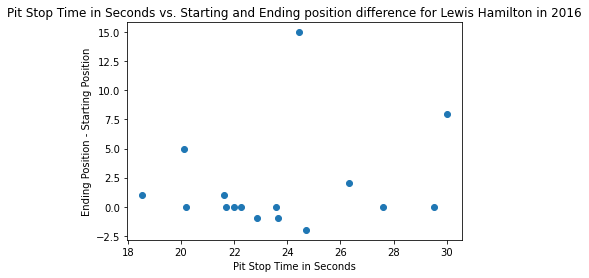

In [16]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [17]:
# We will now repeat the process for Lewis Hamilton is driverId = 1 and we will analyze his 2018 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2018
hamilton_pit_times = getDriverPitTimes(1,2018)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2018
hamilton_difference = getDriverDifferences(1,2018,hamilton_pit_times)

hamilton_pit_times

raceId  new_time
0      989   21.8210
1      990   24.3020
2      991   22.4640
3      992   20.8530
4      993   22.0850
5      994   23.7390
6      995   23.3350
7      996   24.3100
9      998   28.9820
10     999   18.9780
11    1000   21.4800
12    1001   20.8735
13    1002   23.7280
14    1003   28.9460
15    1004   29.5510
16    1005   22.6140
17    1006   23.8040
18    1007   22.3340
19    1008   22.6410
20    1009   21.2830

In [18]:
hamilton_difference

raceId  grid position  difference
0      989     1        2        -1.0
1      990     9        3         6.0
2      991     4        4         0.0
3      992     2        1         1.0
4      993     1        1         0.0
5      994     3        3         0.0
6      995     4        5        -1.0
7      996     1        1         0.0
8      998     1        2        -1.0
9      999    14        1        13.0
10    1000     1        1         0.0
11    1001     1        2        -1.0
12    1002     3        1         2.0
13    1003     1        1         0.0
14    1004     2        1         1.0
15    1005     1        1         0.0
16    1006     1        3        -2.0
17    1007     3        4        -1.0
18    1008     1        1         0.0
19    1009     1        1         0.0

Text(0, 0.5, 'Ending Position - Starting Position')

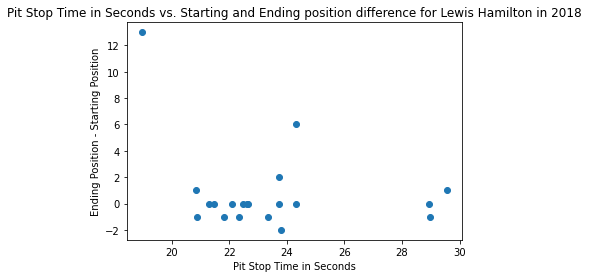

In [19]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [20]:
# We will now repeat the process for Lewis Hamilton is driverId = 1 and we will analyze his 2020 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2018
hamilton_pit_times = getDriverPitTimes(1,2020)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2018
hamilton_difference = getDriverDifferences(1,2020,hamilton_pit_times)

hamilton_pit_times.head()

raceId   new_time
0    1031  19.107500
1    1032  21.729000
2    1033  22.336667
3    1034  28.805000
4    1035  28.904000

In [21]:
hamilton_difference

raceId  grid position  difference
0     1031     5        4         1.0
1     1032     1        1         0.0
2     1033     1        1         0.0
3     1034     1        1         0.0
4     1035     2        2         0.0
5     1036     1        1         0.0
6     1037     1        1         0.0
7     1040     1        3        -2.0
8     1041     2        1         1.0
9     1042     1        1         0.0
10    1043     2        1         1.0
11    1044     6        1         5.0
12    1047     3        3         0.0

Text(0, 0.5, 'Ending Position - Starting Position')

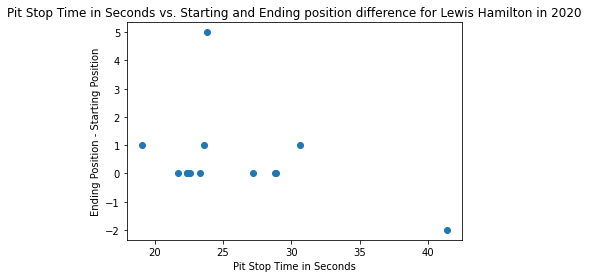

In [22]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After graphing a scatter plot for Lewis' pit stop times in 3 different years one thing that we notice is that the majority of the points are between 20 and 25 seconds with minimal position changes. Lewis Hamilton is considered one of the best F1 drivers who qualifies in the top 5 for the most part. Seeing minimal changes in position as well as minimal difference in positions when his pit stop times is higher is to be expected as he is a very skilled driver. There are many factors that can contribute to the performance of a driver other than just the pit stop times. Some interfering factors that may play a part are weather, performance of other drivers, team decision making, tire strategy, fuel strategy, etc.

<h1><center>Daniel Riccardo</center></h1>

![SegmentLocal](pics/riccardo.gif "segment")

In [23]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Dnaiel Riccardo is driverId = 817 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Daniel Riccardo (DriverId: 817) in 2016
ricccardo_pit_times = getDriverPitTimes(817,2016)
# Calling the function to get the differences for Daniel Riccardo (DriverId: 817) in 2016
riccardo_difference = getDriverDifferences(817,2016,ricccardo_pit_times)
ricccardo_pit_times.head()

raceId   new_time
1     949  25.350333
2     950  23.093000
3     951  39.484000
4     952  22.164500
5     953  30.190500

In [24]:
riccardo_difference.head()

raceId  grid position  difference
0     949     5        4         1.0
1     950     2        4        -2.0
2     951     5       11        -6.0
3     952     3        4        -1.0
4     953     1        2        -1.0

Text(0, 0.5, 'Ending Position - Starting Position')

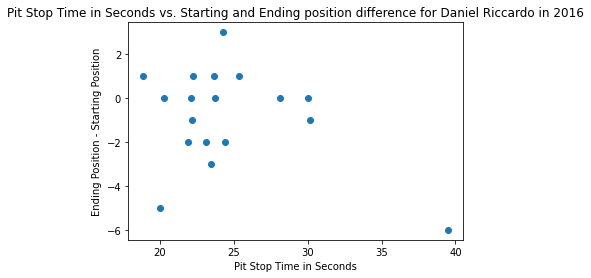

In [25]:
plt.scatter(ricccardo_pit_times['new_time'], riccardo_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Daniel Riccardo in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [26]:
# We will repeat the process with Daniel Riccardo is driverId = 8 and we will analyze his 2018 pit stop times

# Calling the function to get the pit times for Daniel Riccardo (DriverId: 817) in 2018
riccardo_pit_times = getDriverPitTimes(8,2018)
# Calling the function to get the differences for Daniel Riccardo (DriverId: 817) in 2018
riccardo_difference = getDriverDifferences(8,2018,riccardo_pit_times)
riccardo_pit_times.head()

raceId  new_time
0     989   21.4210
2     991   22.9130
3     992   25.5805
4     994   24.2630
5     995   23.6450

In [27]:
riccardo_difference.head()

raceId  grid position  difference
0     989     2        3        -1.0
1     991     2        3        -1.0
2     992     6        2         4.0
3     994     4        4         0.0
4     995     5        6        -1.0

Text(0, 0.5, 'Ending Position - Starting Position')

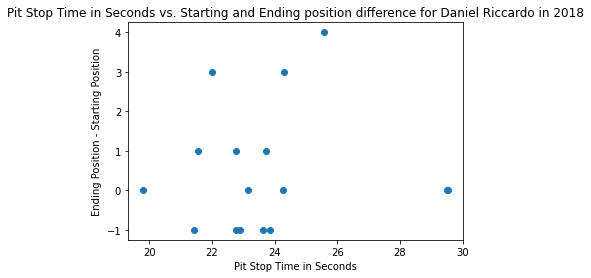

In [28]:
plt.scatter(riccardo_pit_times['new_time'], riccardo_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Daniel Riccardo in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [29]:
# We will repeat the process with Daniel Riccardo is driverId = 8 and we will analyze his 2020 pit stop times

# Calling the function to get the pit times for Daniel Riccardo (DriverId: 817) in 2020
riccardo_pit_times = getDriverPitTimes(8,2020)
# Calling the function to get the differences for Daniel Riccardo (DriverId: 817) in 2020
riccardo_difference = getDriverDifferences(8,2020,riccardo_pit_times)
riccardo_pit_times.head()

raceId  new_time
1    1032   21.4590
2    1033   24.7135
3    1034   40.3375
4    1035   29.2960
5    1036   22.2555

In [30]:
riccardo_difference.head()

raceId  grid position  difference
0    1032    16       11         5.0
1    1033    20       15         5.0
2    1034    16       17        -1.0
3    1035    20       15         5.0
4    1036    14       14         0.0

Text(0, 0.5, 'Ending Position - Starting Position')

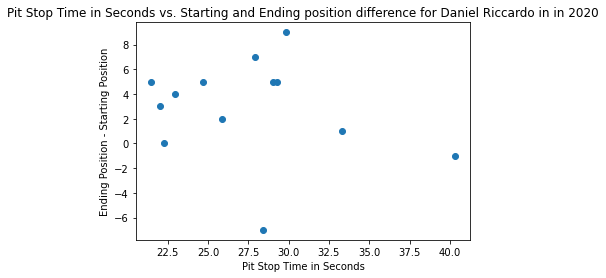

In [31]:
plt.scatter(riccardo_pit_times['new_time'], riccardo_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Daniel Riccardo in in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After plotting Daniel Riccardo's pit stop data we can see similar to Hamilton's data the majority of his pit stop times is between 20 and 25 seconds. In additon, we can see that as pit stop times increase Daniel either places the same or slightly less than what he started in. However, in 2020 even with good pit stop times there are occasions where Daniel places less than what he started in. It is possible that factors outside of pit stop times can affect what place a driver finishes in.

<h1><center>Sebastian Vettel</center></h1>

![SegmentLocal](pics/vettel.png "segment")

In [32]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Sebastian Vettel is driverId = 20 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2016
vettel_pit_times = getDriverPitTimes(20,2016)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2016
vettel_difference = getDriverDifferences(20,2016,vettel_pit_times)
vettel_pit_times.head()

raceId   new_time
1     950  24.913667
2     952  21.954333
3     953  25.337500
4     954  22.479000
5     955  20.422000

In [33]:
vettel_difference.head()

raceId  grid position  difference
0     950     4        2         2.0
1     952     6        3         3.0
2     953     4        4         0.0
3     954     3        2         1.0
4     955     3        2         1.0

Text(0, 0.5, 'Ending Position - Starting Position')

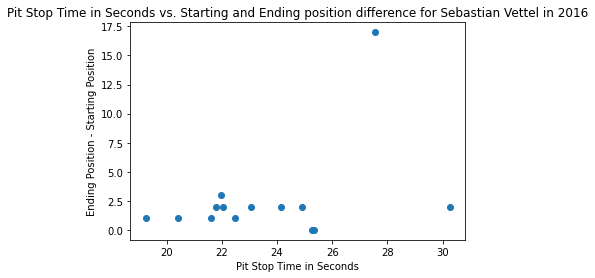

In [34]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [35]:
# We will repeat the process for Sebastian Vettel is driverId = 20 and we will analyze his 2018 pit stop times
# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2018
vettel_pit_times = getDriverPitTimes(20,2018)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2018
vettel_difference = getDriverDifferences(20,2018,vettel_pit_times)
vettel_pit_times.head()

raceId  new_time
0     989   21.7870
1     990   24.5240
2     991   23.0090
3     992   20.4300
4     993   23.1635

In [36]:
vettel_difference.head()

raceId  grid position  difference
0     989     3        1         2.0
1     990     1        1         0.0
2     991     1        8        -7.0
3     992     1        4        -3.0
4     993     3        4        -1.0

Text(0, 0.5, 'Ending Position - Starting Position')

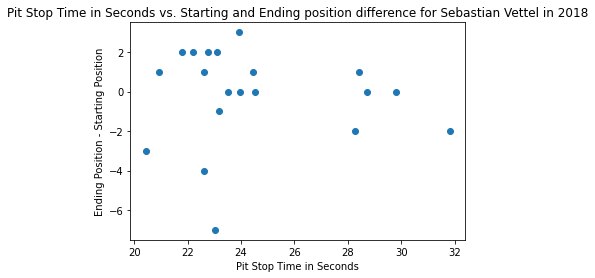

In [37]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [38]:
# We will repeat the process for Sebastian Vettel is driverId = 20 and we will analyze his 2020 pit stop times
# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2020
vettel_pit_times = getDriverPitTimes(20,2020)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2020
vettel_difference = getDriverDifferences(20,2020,vettel_pit_times)
vettel_pit_times.head()

raceId  new_time
0    1031   21.4330
1    1033   25.0830
2    1034   29.4390
3    1035   28.2595
4    1036   21.8200

In [39]:
vettel_difference.head()

raceId  grid position  difference
0    1031    11       10         1.0
1    1033     5        6        -1.0
2    1034    10       10         0.0
3    1035    11       12        -1.0
4    1036    11        7         4.0

Text(0, 0.5, 'Ending Position - Starting Position')

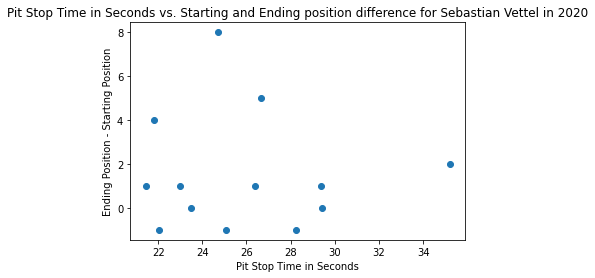

In [40]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After plotting Sebastian Vettel's data we can see that the majority of his points are clustered around 0 for the y axis indicating minimal position changes. With higher pit stop times we can also see that he has minimal position changes. This can also indicate external factors such as accidents and lap times can affect a drivers final position.

The correlation between pit stop times and position is minimal based on the scatter plots. We must now take into consideration other factors that can influence a drivers final position such as lap times in a race. If we take the average lap time a driver has in a given race we can assume that a better average lap time in comparison to other drivers would result in a higher placed position. On the contrary we can say a worse average lap time in comparison to others would result in a lower placed position. We will now visualize this data per race in a given year and graph all the drivers average lap time for a given race and see their respective position difference. Spa is a circuit that is well known by fans and is known to be a circuit that is very competitive. We will analyze lap times in different years for this cirucit.

<h1><center>Formula One 2020 Season</center></h1>

![SegmentLocal](pics/f12020.jpeg "segment")

In [41]:
#2020
new_race_data_2020 = race_data[(race_data['year'] == 2020)]

# Extract the circuits that were raced on in this time frame
unique_circuits_2020 = new_race_data_2020['circuitId'].unique()
new_circuit_data_2020 = circuit_data[np.isin(circuit_data['circuitId'], unique_circuits_2020)]

# Extract the results of the races between the time frame
new_result_data_2020 = result_data[np.isin(result_data, new_race_data_2020['raceId'])]

# Extract the drivers that raced in this time frame
new_driver_data_2020 = driver_data[np.isin(driver_data, new_result_data_2020['driverId'])]
for index, rows in new_driver_data_2020.iterrows():
    if rows['number'] == '\\N':
        new_driver_data_2020.drop(index, inplace = True)
new_circuit_data_2020


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


circuitId     circuitRef                                  name  \
2           3        bahrain         Bahrain International Circuit   
3           4      catalunya        Circuit de Barcelona-Catalunya   
4           5       istanbul                         Istanbul Park   
8           9    silverstone                   Silverstone Circuit   
10         11    hungaroring                           Hungaroring   
12         13            spa          Circuit de Spa-Francorchamps   
13         14          monza          Autodromo Nazionale di Monza   
19         20    nurburgring                           Nürburgring   
20         21          imola         Autodromo Enzo e Dino Ferrari   
23         24     yas_marina                    Yas Marina Circuit   
69         70  red_bull_ring                         Red Bull Ring   
70         71          sochi                        Sochi Autodrom   
74         75       portimao    Autódromo Internacional do Algarve   
75         76        mugello  Autodromo Internazionale del Mugello   

       location   country      lat       lng  alt  \
2        Sakhir   Bahrain  26.0325  50.51060    7   
3      Montmeló     Spain  41.5700   2.26111  109   
4      Istanbul    Turkey  40.9517  29.40500  130   
8   Silverstone        UK  52.0786  -1.01694  153   
10     Budapest   Hungary  47.5789  19.24860  264   
12          Spa   Belgium  50.4372   5.97139  401   
13        Monza     Italy  45.6156   9.28111  162   
19      Nürburg   Germany  50.3356   6.94750  578   
20        Imola     Italy  44.3439  11.71670   37   
23    Abu Dhabi       UAE  24.4672  54.60310    3   
69    Spielburg   Austria  47.2197  14.76470  678   
70        Sochi    Russia  43.4057  39.95780    2   
74     Portimão  Portugal  37.2270  -8.62670  108   
75      Mugello     Italy  43.9975  11.37190  255   

                                                  url  
2   http://en.wikipedia.org/wiki/Bahrain_Internati...  
3   http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4          http://en.wikipedia.org/wiki/Istanbul_Park  
8    http://en.wikipedia.org/wiki/Silverstone_Circuit  
10           http://en.wikipedia.org/wiki/Hungaroring  
12  http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...  
13  http://en.wikipedia.org/wiki/Autodromo_Naziona...  
19      http://en.wikipedia.org/wiki/N%C3%BCrburgring  
20  http://en.wikipedia.org/wiki/Autodromo_Enzo_e_...  
23    http://en.wikipedia.org/wiki/Yas_Marina_Circuit  
69         http://en.wikipedia.org/wiki/Red_Bull_Ring  
70        http://en.wikipedia.org/wiki/Sochi_Autodrom  
74  http://en.wikipedia.org/wiki/Algarve_Internati...  
75       http://en.wikipedia.org/wiki/Mugello_Circuit

In [106]:
# Removing invalid rows from the dataset
try:
    new_result_data['difference'] = new_result_data['grid'].astype(float) - new_result_data['position'].astype(float)
except:
    for index, row in new_result_data.iterrows():
        if row['position'] == '\\N':
            new_result_data.drop(index, inplace = True)
    new_result_data['difference'] = new_result_data['grid'].astype(float) - new_result_data['position'].astype(float)

# Merging the datasets together
new_merge_data = new_result_data
new_merge_data = pd.merge(new_merge_data,new_driver_data, on='driverId')
new_merge_data = pd.merge(new_merge_data,new_race_data, on='raceId')
new_merge_data = pd.merge(new_merge_data,new_circuit_data, on='circuitId')

new_merge_data

<ipython-input-106-6d322bc7d886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_result_data['difference'] = new_result_data['grid'].astype(float) - new_result_data['position'].astype(float)


resultId  raceId  driverId  constructorId number_x  grid position  \
0        22917     948         3            131        6     2        1   
1        22921     948        13              3       19     6        5   
2        22930     948        18              1       22    12       14   
3        22918     948         1            131       44     1        2   
4        22919     948        20              6        5     3        3   
...        ...     ...       ...            ...      ...   ...      ...   
1853     24898    1044       842            213       10    19       13   
1854     24889    1044       844              6       16    12        4   
1855     24893    1044       846              1        4    14        8   
1856     24892    1044       848              9       23     4        7   
1857     24901    1044       847              3       63     0       16   

     positionText  positionOrder  points  ...    time_y  \
0               1              1    25.0  ...  05:00:00   
1               5              5    10.0  ...  05:00:00   
2              14             14     0.0  ...  05:00:00   
3               2              2    18.0  ...  05:00:00   
4               3              3    15.0  ...  05:00:00   
...           ...            ...     ...  ...       ...   
1853           13             13     0.0  ...  10:10:00   
1854            4              4    12.0  ...  10:10:00   
1855            8              8     5.0  ...  10:10:00   
1856            7              7     6.0  ...  10:10:00   
1857           16             16     0.0  ...  10:10:00   

                                                  url_y   circuitRef  \
0     https://en.wikipedia.org/wiki/2016_Australian_...  albert_park   
1     https://en.wikipedia.org/wiki/2016_Australian_...  albert_park   
2     https://en.wikipedia.org/wiki/2016_Australian_...  albert_park   
3     https://en.wikipedia.org/wiki/2016_Australian_...  albert_park   
4     https://en.wikipedia.org/wiki/2016_Australian_...  albert_park   
...                                                 ...          ...   
1853  https://en.wikipedia.org/wiki/2020_Turkish_Gra...     istanbul   
1854  https://en.wikipedia.org/wiki/2020_Turkish_Gra...     istanbul   
1855  https://en.wikipedia.org/wiki/2020_Turkish_Gra...     istanbul   
1856  https://en.wikipedia.org/wiki/2020_Turkish_Gra...     istanbul   
1857  https://en.wikipedia.org/wiki/2020_Turkish_Gra...     istanbul   

                              name_y   location    country      lat      lng  \
0     Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968   
1     Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968   
2     Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968   
3     Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968   
4     Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968   
...                              ...        ...        ...      ...      ...   
1853                   Istanbul Park   Istanbul     Turkey  40.9517   29.405   
1854                   Istanbul Park   Istanbul     Turkey  40.9517   29.405   
1855                   Istanbul Park   Istanbul     Turkey  40.9517   29.405   
1856                   Istanbul Park   Istanbul     Turkey  40.9517   29.405   
1857                   Istanbul Park   Istanbul     Turkey  40.9517   29.405   

      alt                                                url  
0      10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1      10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2      10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
3      10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
4      10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
...   ...                                                ...  
1853  130         http://en.wikipedia.org/wiki/Istanbul_Park  
1854  130         http://en.wikipedia.org/wiki/Istanbul_Park  
185

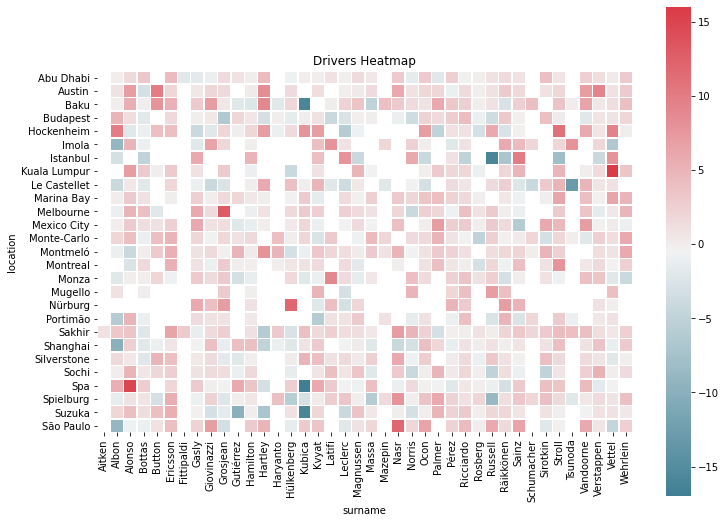

In [107]:
# Plotting the heatmap
pivot = new_merge_data.pivot_table(index='location', columns='surname', values='difference')
cmap = sns.diverging_palette(220,10, as_cmap=True)

f, ax = plt.subplots(figsize=(12,9))
plt.title('Drivers Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [108]:
def getLapDataByRace(year, circuitId):
    # Getting race data in the given year
    race_data = new_race_data[(new_race_data['year'] == year)]
    race_id = race_data[(race_data['circuitId'] == circuitId)]
    race_id = race_id.raceId
    
    # Getting the drivers that drove in the given year
    drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]
    drivers = drivers['driverId']
    
    new_index = list(range(0, len(drivers)))
    drivers.index = new_index
    
    # Getting average lap times of the drivers in the given year and circuit
    average_lap_data = {}
    for driver in drivers:
        temp_lap_data = new_lap_data[(new_lap_data['driverId'] == driver)]
        temp_lap_data = temp_lap_data[(temp_lap_data['raceId'] == int(race_id))]
        average_lap_data[driver] = (temp_lap_data['milliseconds'].mean()) / 1000

    average_lap_data = pd.DataFrame(average_lap_data.items(), columns=['driverId', 'averageTime'])
    
    drop_drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]

    # Drop rows with drivers that never finished race
    for data in drop_drivers.iterrows():
        if data[1]['position'] == '\\N':
            average_lap_data = average_lap_data[average_lap_data.driverId != data[1]['driverId']]
    
    # Calculate the difference in position for each of the drivers
    driver_differences = []
    
    temp = new_result_data[np.isin(new_result_data, int(race_id))]
    difference = temp[(temp['driverId'] == 3)]

    for driver in average_lap_data.iterrows():
        temp = new_result_data[np.isin(new_result_data, int(race_id))]
        difference = temp[(temp['driverId'] == driver[1]['driverId'])]
        driver_differences.append(int(difference['grid'].astype(int) - difference['position'].astype(int)))
    
    average_lap_data['positionDiff'] = driver_differences
    
    return average_lap_data

In [109]:
# We will conduct our first analysis in the year 2016 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

avg_lap_data = getLapDataByRace(2016,13)
avg_lap_data

driverId  averageTime  positionDiff
0          3   142.978591             0
1        817   143.299341             3
2          1   143.606636            18
3        807   143.794659             3
4        815   143.902682             1
5         20   144.010273            -2
6          4   144.329614            15
7        822   144.345659             0
8          8   144.367432            -6
9         13   144.475705             0
10       830   144.595364            -9
11       821   144.657614             6
12       154   144.716636            -2
13       826   144.958068             5
14       835   145.095977            -2
15       839   146.567000             1
16       831   146.593884            -1

Text(0, 0.5, 'Ending Position - Starting Position')

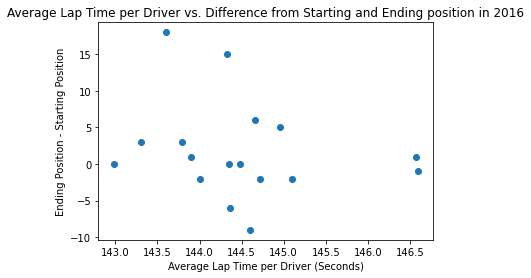

In [117]:
plt.scatter(avg_lap_data['averageTime'], avg_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2016")
plt.xlabel('Average Lap Time per Driver (Seconds)')
plt.ylabel('Ending Position - Starting Position')

In [102]:
# We will conduct our second analysis in the year 2018 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

avg_lap_data = getLapDataByRace(2018,13)
avg_lap_data

driverId  averageTime  positionDiff
0         20   113.965364             1
1          1   114.216750            -1
2        830   114.678364             4
3        822   115.410932            15
4        815   115.579523            -1
5        839   115.772636            -3
6        154   115.918841            -2
7        825   115.957159             1
8        842   116.372000             1
9        828   116.731326             3
10       832   117.020814             3
11       845   117.077535             4
12       840   117.128930             4
13       843   117.500419            -3
14       838   117.645744             3

Text(0, 0.5, 'Ending Position - Starting Position')

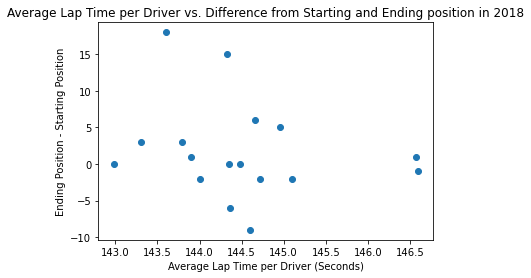

In [116]:
plt.scatter(avg_lap_data['averageTime'], avg_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2018")
plt.xlabel('Average Lap Time per Driver (Seconds)')
plt.ylabel('Ending Position - Starting Position')

In [104]:
# We will conduct our last analysis in the year 2020 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

avg_lap_data = getLapDataByRace(2020,13)
avg_lap_data

driverId  averageTime  positionDiff
0          1   114.744568             0
1        822   114.936568             0
2        830   115.095818             0
3        817   115.173591             0
4        839   115.668432             1
5        848   115.715295            -1
6        846   115.739432             3
7        842   115.821182             4
8        840   115.940091             0
9        815   115.953182            -2
10       826   116.340023             0
11         8   116.369659             4
12        20   116.401250             1
13       844   116.447295            -1
14       154   116.489864             2
15       849   116.512636             3
16       825   116.688659             3

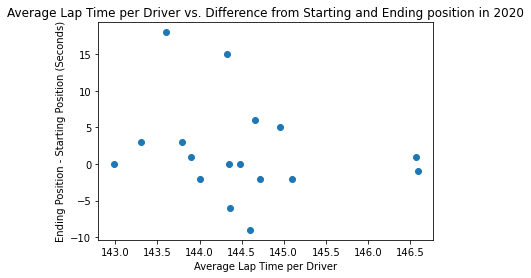

In [115]:
plt.scatter(avg_lap_data['averageTime'], avg_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2020")
plt.xlabel('Average Lap Time per Driver')
plt.ylabel('Ending Position - Starting Position (Seconds)')
plt.show()

new_time  position
0   21.7090         2
1   20.2550         1
2   30.6845         2
3   29.7390         4
4   21.6330         1

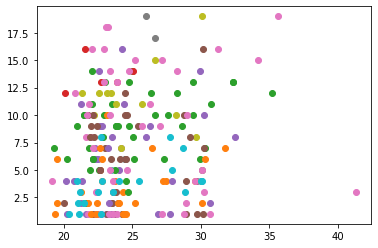

In [111]:
pitTimes = []
years = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,202016,2017,2018,2019,2020]
driverDifferences = []
for index, row in new_driver_data.iterrows():
    for i in years:
        try:
            x = getDriverPitTimes(row['driverId'], i)
            y = getDriverDifferences(row['driverId'],i,x).astype(int)
            pitTimes.append(x)
            driverDifferences.append(y)
            plt.scatter(x['new_time'],y['position'])     
        except:
            continue
pitTimesDf = pd.concat(pitTimes)
driverDifferencesDf = pd.concat(driverDifferences)
pitTimesDf = pitTimesDf.drop('raceId', 1)
driverDifferencesDf = driverDifferencesDf.drop('raceId', 1)
driverDifferencesDf = driverDifferencesDf.drop('grid', 1)
driverDifferencesDf = driverDifferencesDf.drop('difference', 1)
new_index = list(range(0, len(driverDifferencesDf)))
driverDifferencesDf.index = new_index
new_index = list(range(0, len(pitTimesDf)))
pitTimesDf.index = new_index
pitTimesDf['position'] = driverDifferencesDf['position']
pitTimesDf.head()

In [112]:
model = KMeans(n_clusters=4)
model.fit(pitTimesDf)
clusters = model.cluster_centers_
clusters

array([[22.67782222,  2.96774194],
       [23.11503309, 10.08695652],
       [28.35386979, 14.0625    ],
       [29.53684792,  4.3       ]])

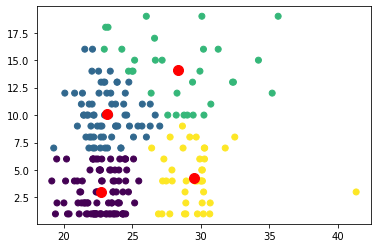

In [113]:
plt.scatter(pitTimesDf['new_time'],pitTimesDf['position'], c=model.labels_)
plt.scatter(clusters[:,0], clusters[:,1], s=100, color="red")
plt.show()